In [ ]:
pip install cohere tiktoken


퍼스널컬러 기반 스타일 추천

In [ ]:
!pip install -q diffusers transformers accelerate openai

모델 로드하기

MUSINSA-IGO (MUSINSA fashion Image Generative Operator)

https://huggingface.co/youngmki/musinsaigo-2.0

In [6]:
import torch
from diffusers import DiffusionPipeline
import openai
import json

device = "cuda" if torch.cuda.is_available() else "cpu"

model_id = "youngmki/musinsaigo-2.0"
pipe = DiffusionPipeline.from_pretrained(
     "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16
)
pipe = pipe.to(device)
pipe.load_lora_weights(model_id)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

pytorch_lora_weights.safetensors:   0%|          | 0.00/29.9M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/diffusers/loaders.py:1905: FutureWarning: `_modify_text_encoder` is deprecated and will be removed in version 0.25. You are using an old version of LoRA backend. This will be deprecated in the next releases in favor of PEFT make sure to install the latest PEFT and transformers packages in the future.
  deprecate("_modify_text_encoder", "0.25", LORA_DEPRECATION_MESSAGE)
/usr/local/lib/python3.10/dist-packages/diffusers/loaders.py:1876: FutureWarning: `_remove_text_encoder_monkey_patch_classmethod` is deprecated and will be removed in version 0.25. You are using an old version of LoRA backend. This will be deprecated in the next releases in favor of PEFT make sure to install the latest PEFT and transformers packages in the future.
  deprecate("_remove_text_encoder_monkey_patch_classmethod", "0.25", LORA_DEPRECATION_MESSAGE)


prompt helper functions

In [7]:
def make_prompt(prompt: str) -> str:
    prompt_prefix = "RAW photo"
    prompt_suffix = "(high detailed skin:1.2), 8k uhd, dslr, soft lighting, high quality, film grain, Fujifilm XT3"
    return ", ".join([prompt_prefix, prompt, prompt_suffix]).strip()

def make_negative_prompt(negative_prompt: str) -> str:
    negative_prefix = "(deformed iris, deformed pupils, semi-realistic, cgi, 3d, render, sketch, cartoon, drawing, anime:1.4), \
    text, close up, cropped, out of frame, worst quality, low quality, jpeg artifacts, ugly, duplicate, morbid, mutilated, \
    extra fingers, mutated hands, poorly drawn hands, poorly drawn face, mutation, deformed, blurry, dehydrated, bad anatomy, \
    bad proportions, extra limbs, cloned face, disfigured, gross proportions, malformed limbs, missing arms, missing legs, \
    extra arms, extra legs, fused fingers, too many fingers, long neck"

    return (
        ", ".join([negative_prefix, negative_prompt]).strip()
        if len(negative_prompt) > 0
        else negative_prefix
    )

inference

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['�의 스커트, 꽃이나 동물 프린트 등 다양한 패턴, 밝은 컬러의 상의와 바지, 연한 노란색의 상의와 밝은 블루 컬러의 바지, 액세서리 강조, 화사한 컬러의 스카프, 큰 귀걸이, 컬러풀한 팔찌, ( high detailed skin : 1. 2 ), 8 k uhd, dslr, soft lighting, high quality, film grain, fujifilm xt 3']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['�의 스커트, 꽃이나 동물 프린트 등 다양한 패턴, 밝은 컬러의 상의와 바지, 연한 노란색의 상의와 밝은 블루 컬러의 바지, 액세서리 강조, 화사한 컬러의 스카프, 큰 귀걸이, 컬러풀한 팔찌, ( high detailed skin : 1. 2 ), 8 k uhd, dslr, soft lighting, high quality, film grain, fujifilm xt 3']


  0%|          | 0/50 [00:00<?, ?it/s]

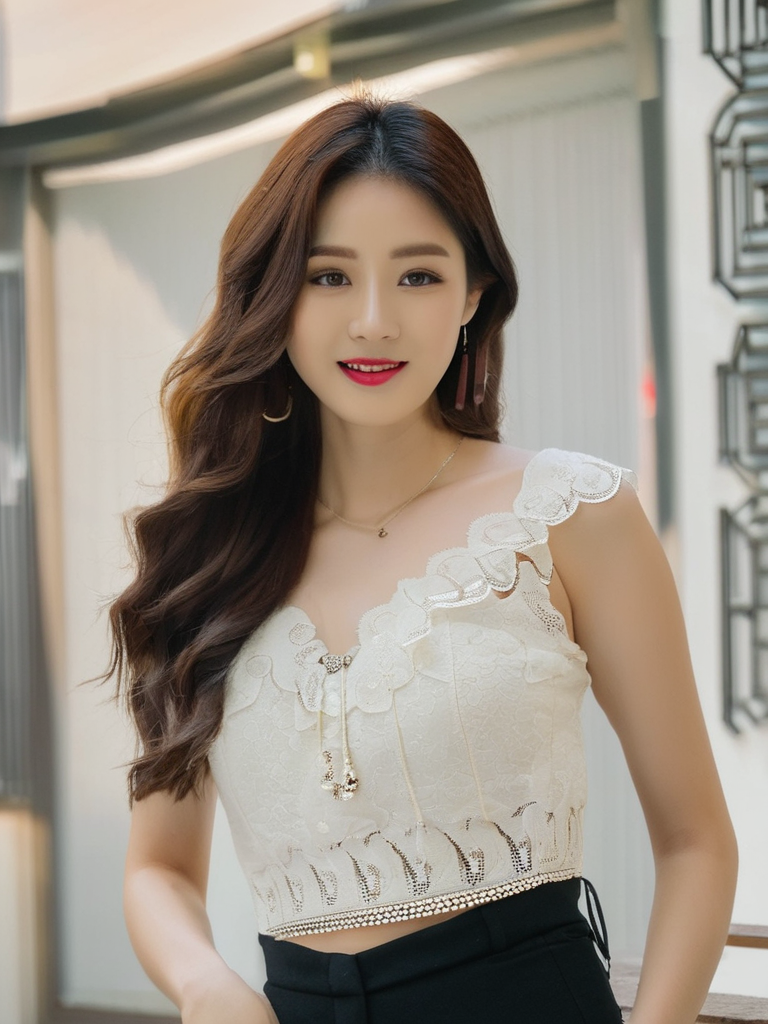

In [14]:
PROMPT= "A Korean beautiful woman in her 20s"+"고명도의 밝고 쨍한 컬러, 연한 핑크나 민트색의 드레스, 화사하고 다채로운 패턴의 스커트, 꽃이나 동물 프린트 등 다양한 패턴, 밝은 컬러의 상의와 바지, 연한 노란색의 상의와 밝은 블루 컬러의 바지, 액세서리 강조, 화사한 컬러의 스카프, 큰 귀걸이, 컬러풀한 팔찌"
#"A Korean woman in her 20s wearing a white large hoodie in street fashion"
NEGATIVE_PROMPT = ""

def generate_image(prompt):
    image = pipe(
        prompt = make_prompt(prompt),
        height=1024,
        width=768,
        rum_inference_steps=50,
        guidance_scale=7.5,
        negative_prompt=make_negative_prompt(NEGATIVE_PROMPT),
        cross_attention_kwargs={"scale":0.75},
    ).images[0]

    return image

generate_image(PROMPT)

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['�한 라벤더, 청순한 립컬러, 연한 핑크나 코랄 컬러의 립스틱, 화사한 패턴 아이템, 꽃무늬나 스트라이프 패턴, 가벼운 베이스 메이크업과 연한 블러셔, ( high detailed skin : 1. 2 ), 8 k uhd, dslr, soft lighting, high quality, film grain, fujifilm xt 3']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['�한 라벤더, 청순한 립컬러, 연한 핑크나 코랄 컬러의 립스틱, 화사한 패턴 아이템, 꽃무늬나 스트라이프 패턴, 가벼운 베이스 메이크업과 연한 블러셔, ( high detailed skin : 1. 2 ), 8 k uhd, dslr, soft lighting, high quality, film grain, fujifilm xt 3']


  0%|          | 0/50 [00:00<?, ?it/s]

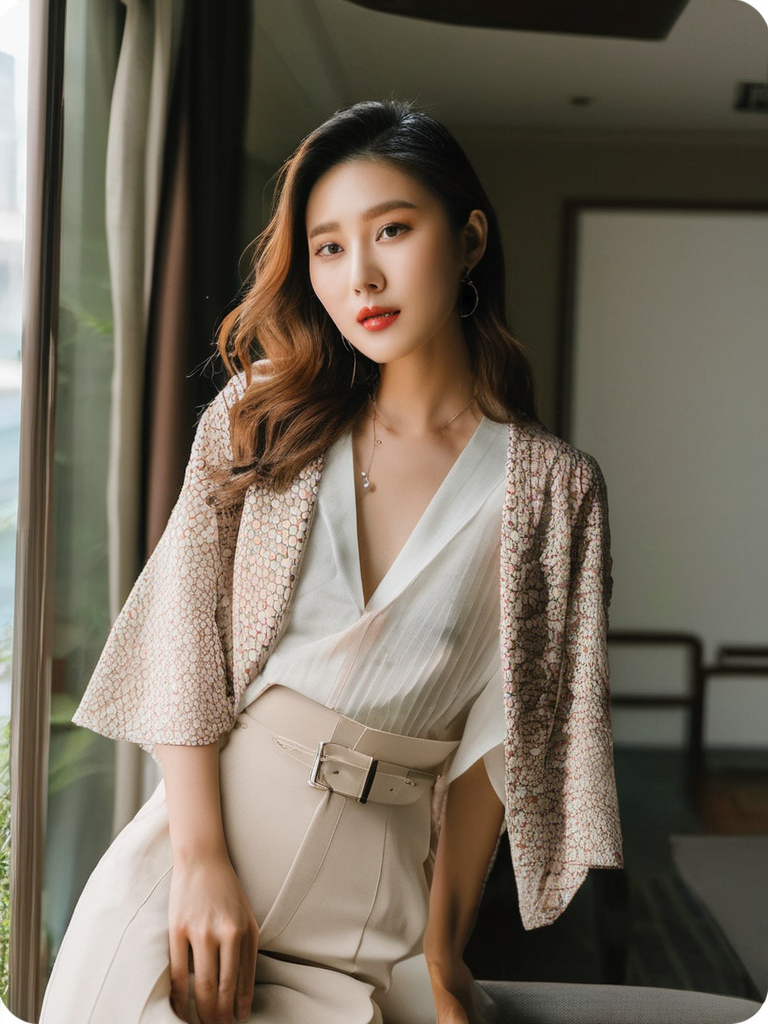

In [16]:
PROMPT= "A Korean woman in her 20s"+"저채도의 파스텔 톤, 파스텔 컬러의 옷이나 액세서리, 연한 핑크, 민트 그린, 연한 라벤더, 청순한 립컬러, 연한 핑크나 코랄 컬러의 립스틱, 화사한 패턴 아이템, 꽃무늬나 스트라이프 패턴, 가벼운 베이스 메이크업과 연한 블러셔"
#"A Korean woman in her 20s wearing a white large hoodie in street fashion"
NEGATIVE_PROMPT = ""

def generate_image(prompt):
    image = pipe(
        prompt = make_prompt(prompt),
        height=1024,
        width=768,
        rum_inference_steps=50,
        guidance_scale=7.5,
        negative_prompt=make_negative_prompt(NEGATIVE_PROMPT),
        cross_attention_kwargs={"scale":0.75},
    ).images[0]

    return image

generate_image(PROMPT)

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['블라우스와 데님, 파스텔 컬러의 목걸이나 팔찌, ( high detailed skin : 1. 2 ), 8 k uhd, dslr, soft lighting, high quality, film grain, fujifilm xt 3']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['블라우스와 데님, 파스텔 컬러의 목걸이나 팔찌, ( high detailed skin : 1. 2 ), 8 k uhd, dslr, soft lighting, high quality, film grain, fujifilm xt 3']


  0%|          | 0/50 [00:00<?, ?it/s]

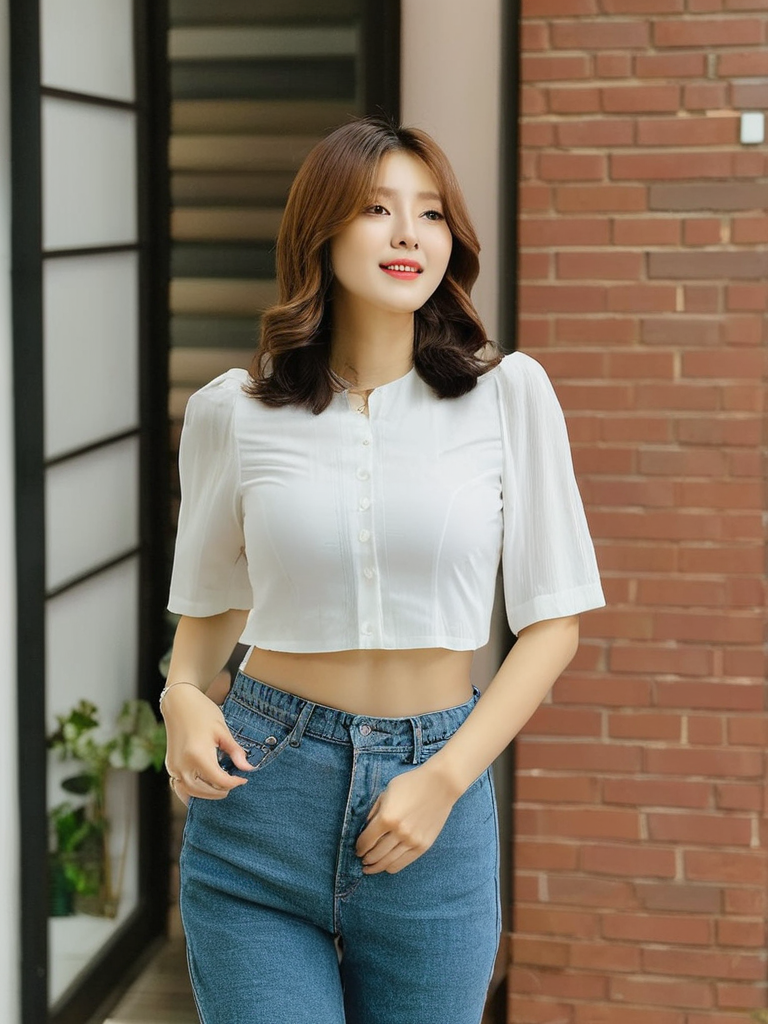

In [12]:
PROMPT= "A Korean beautiful woman in her 20s"+"탁기가 많은 파스텔, 플로럴 패턴 드레스, 넓은 치마와 크롭 탑, 라이트 컬러의 블라우스와 데님, 파스텔 컬러의 목걸이나 팔찌"
#"A Korean woman in her 20s wearing a white large hoodie in street fashion"
NEGATIVE_PROMPT = ""

def generate_image(prompt):
    image = pipe(
        prompt = make_prompt(prompt),
        height=1024,
        width=768,
        rum_inference_steps=50,
        guidance_scale=7.5,
        negative_prompt=make_negative_prompt(NEGATIVE_PROMPT),
        cross_attention_kwargs={"scale":0.75},
    ).images[0]

    return image

generate_image(PROMPT)

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['�의 드레스, 라이트 컬러 블라우스와 스커트, 캐주얼한 쇼츠와 티셔츠, 밝은 컬러의 쇼츠와 흰 티셔츠, 밝은 컬러의 귀걸이, 팔찌, 목걸이, ( high detailed skin : 1. 2 ), 8 k uhd, dslr, soft lighting, high quality, film grain, fujifilm xt 3']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['�의 드레스, 라이트 컬러 블라우스와 스커트, 캐주얼한 쇼츠와 티셔츠, 밝은 컬러의 쇼츠와 흰 티셔츠, 밝은 컬러의 귀걸이, 팔찌, 목걸이, ( high detailed skin : 1. 2 ), 8 k uhd, dslr, soft lighting, high quality, film grain, fujifilm xt 3']


  0%|          | 0/50 [00:00<?, ?it/s]

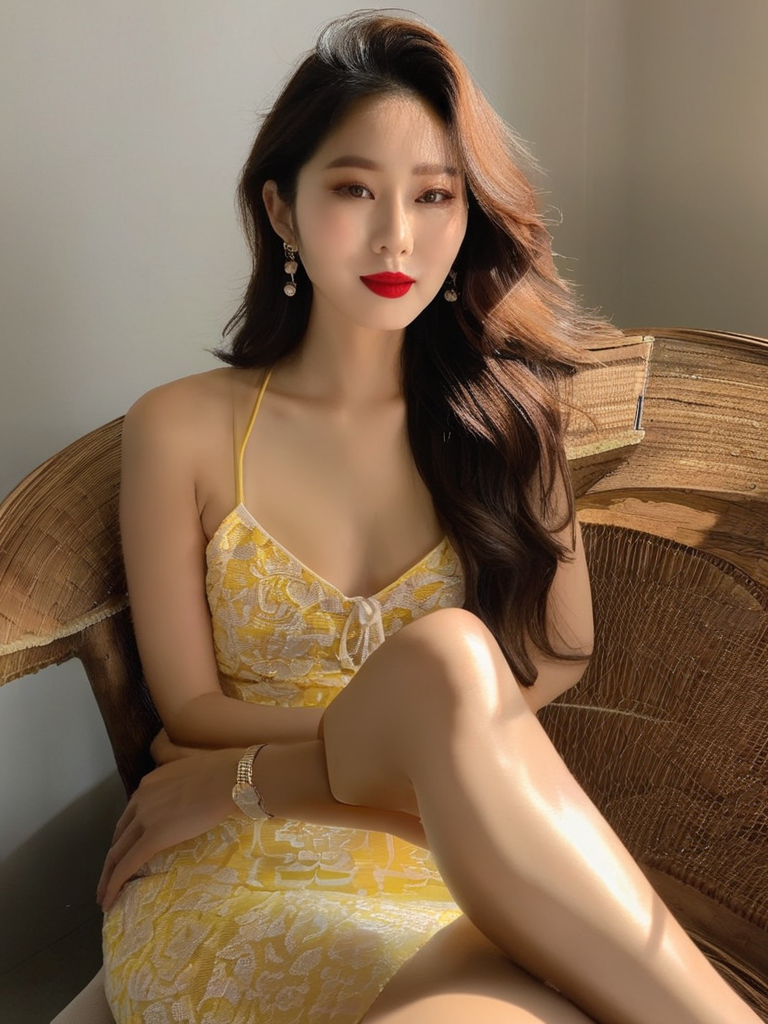

In [11]:
PROMPT= "A Korean beautiful woman in her 20s"+"밝고 은은한 파스텔 톤, 싱그럽고 투명한 느낌, 밝고 화사한 플로럴 패턴의 드레스, 라이트 컬러 블라우스와 스커트, 캐주얼한 쇼츠와 티셔츠, 밝은 컬러의 쇼츠와 흰 티셔츠, 밝은 컬러의 귀걸이, 팔찌, 목걸이"

#"A Korean woman in her 20s wearing a white large hoodie in street fashion"
NEGATIVE_PROMPT = ""

def generate_image(prompt):
    image = pipe(
        prompt = make_prompt(prompt),
        height=1024,
        width=768,
        rum_inference_steps=50,
        guidance_scale=7.5,
        negative_prompt=make_negative_prompt(NEGATIVE_PROMPT),
        cross_attention_kwargs={"scale":0.75},
    ).images[0]

    return image

generate_image(PROMPT)

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['색, 어두운 그린, 섹시한 실루엣, 여리여리한 의상, 플레어 스커트, 허리를 강조하는 드레스, 은은한 메이크업, 브라운 계열의 아이섀도우와 립스틱, 자연스럽고 세련된 느낌, 골드나 은색 악세서리, ( high detailed skin : 1. 2 ), 8 k uhd, dslr, soft lighting, high quality, film grain, fujifilm xt 3']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['색, 어두운 그린, 섹시한 실루엣, 여리여리한 의상, 플레어 스커트, 허리를 강조하는 드레스, 은은한 메이크업, 브라운 계열의 아이섀도우와 립스틱, 자연스럽고 세련된 느낌, 골드나 은색 악세서리, ( high detailed skin : 1. 2 ), 8 k uhd, dslr, soft lighting, high quality, film grain, fujifilm xt 3']


  0%|          | 0/50 [00:00<?, ?it/s]

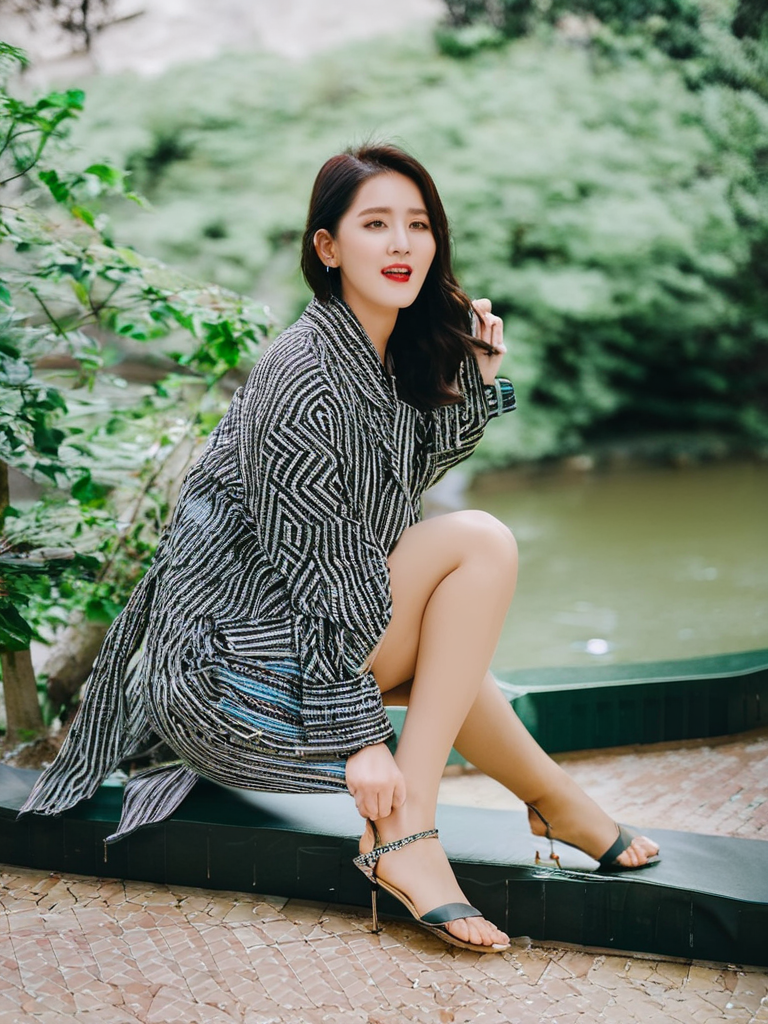

In [ ]:
PROMPT= "A Korean woman in her 20s"+"어두운 음영이 있는 색상, 섹시한 매력, 어두운 컬러의 의상, 검정, 짙은 갈색, 어두운 그린, 섹시한 실루엣, 여리여리한 의상, 플레어 스커트, 허리를 강조하는 드레스, 은은한 메이크업, 브라운 계열의 아이섀도우와 립스틱, 자연스럽고 세련된 느낌, 골드나 은색 악세서리"
#"A Korean woman in her 20s wearing a white large hoodie in street fashion"
NEGATIVE_PROMPT = ""

def generate_image(prompt):
    image = pipe(
        prompt = make_prompt(prompt),
        height=1024,
        width=768,
        rum_inference_steps=50,
        guidance_scale=7.5,
        negative_prompt=make_negative_prompt(NEGATIVE_PROMPT),
        cross_attention_kwargs={"scale":0.75},
    ).images[0]

    return image

generate_image(PROMPT)

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['�은 갈색, 어두운 그린, 섹시한 실루엣, 여리여리한 의상, 플레어 스커트, 허리를 강조하는 드레스, 은은한 메이크업, 브라운 계열의 아이섀도우와 립스틱, 자연스럽고 세련된 느낌, 골드나 은색 악세서리, ( high detailed skin : 1. 2 ), 8 k uhd, dslr, soft lighting, high quality, film grain, fujifilm xt 3']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['�은 갈색, 어두운 그린, 섹시한 실루엣, 여리여리한 의상, 플레어 스커트, 허리를 강조하는 드레스, 은은한 메이크업, 브라운 계열의 아이섀도우와 립스틱, 자연스럽고 세련된 느낌, 골드나 은색 악세서리, ( high detailed skin : 1. 2 ), 8 k uhd, dslr, soft lighting, high quality, film grain, fujifilm xt 3']


  0%|          | 0/50 [00:00<?, ?it/s]

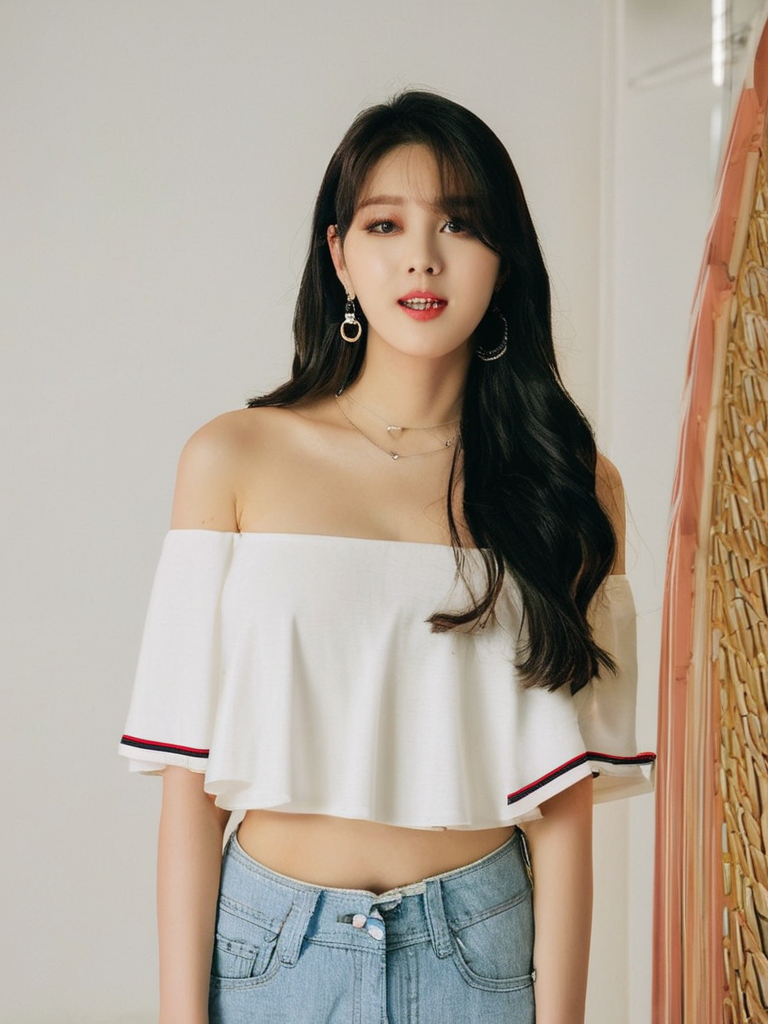

In [ ]:
PROMPT= "A Korean k-pop girlgroup member in her 20s"+"어두운 음영이 있는 색상, 섹시한 매력, 어두운 컬러의 의상, 검정, 짙은 갈색, 어두운 그린, 섹시한 실루엣, 여리여리한 의상, 플레어 스커트, 허리를 강조하는 드레스, 은은한 메이크업, 브라운 계열의 아이섀도우와 립스틱, 골드나 은색 악세서리"
#"A Korean woman in her 20s wearing a white large hoodie in street fashion"
NEGATIVE_PROMPT = ""

def generate_image(prompt):
    image = pipe(
        prompt = make_prompt(prompt),
        height=1024,
        width=768,
        rum_inference_steps=50,
        guidance_scale=7.5,
        negative_prompt=make_negative_prompt(NEGATIVE_PROMPT),
        cross_attention_kwargs={"scale":0.75},
    ).images[0]

    return image

generate_image(PROMPT)